In [1]:
import PIL
from PIL import Image, ImageDraw
from IPython.display import display
import numpy as np
import json
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
fill_color = (255, 255, 255)
outline_color = (0, 0, 0)
bg_color = (0, 0, 0)
W,H = 64, 64

save_path = "D:\\Saarbrucken\\EDA_Research\\thesis_code\\1dvaetestdata\\testdata\\"

#draw.ellipse((50, 50, 150, 150), fill=fill_color, outline=outline_color)

for i in range(1000):
    continue
    x_offset, y_offset = 4 * np.random.randn() + 1,  2 * np.random.randn() + 1
    #print(x_offset, y_offset)
    im = Image.new('RGB', (W, H), bg_color)
    draw = ImageDraw.Draw(im)
    rect_bounds = (W/4 + x_offset, W/4 + y_offset, W/2 + x_offset, W/2 + y_offset)
    
    what_to_gen = np.random.randint(low=0,high=2) # 0 = circle, 1 = square, high is exclusive
    
    draw.rectangle(ellipse_bounds if what_to_gen == 1 else rect_bounds, 
                   fill=fill_color, 
                   outline=outline_color)
    
    im.save(save_path + f'image{i}_{what_to_gen}.jpg')
    #display(im)


In [30]:
fill_color = (255, 255, 255)
outline_color = (0, 0, 0)
bg_color = (0, 0, 0)
W,H = 64, 64

save_path = "D:\\Saarbrucken\\EDA_Research\\thesis_code\\datasets\\OneDimContinumData\\"

for i in range(20):

    im = Image.new('RGB', (W, H), bg_color)
    draw = ImageDraw.Draw(im)
    x_offset, y_offset = 0, 0
    rect_bounds = (W/4 + x_offset, W/4 + y_offset, W/2 + x_offset, W/2 + y_offset)
    
    rnd_radius = np.random.randint(low=0, high=9)
    draw.rounded_rectangle(rect_bounds,
               radius=rnd_radius,
               fill=fill_color, 
               outline=outline_color)
    
    im.save(save_path + f'image_{i}_{rnd_radius}.jpg')

(array([21.,  0.,  0.,  0.,  0., 15.,  0.,  0.,  0., 14.]),
 array([-0.09133868, -0.08587217, -0.08040567, -0.07493916, -0.06947266,
        -0.06400615, -0.05853965, -0.05307314, -0.04760664, -0.04214013,
        -0.03667362]),
 <BarContainer object of 10 artists>)

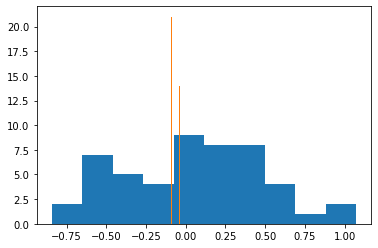

In [7]:
latent_codes = json.load(open("D:\\Saarbrucken\\EDA_Research\\thesis_code\\PyTorch-VAE\\logs\\latent_codes.pt",'r'))

plt.hist(latent_codes['circle_mus'])
plt.hist(latent_codes['square_mus'])

(array([15.,  0.,  0., 14.,  0.,  0.,  0.,  0.,  0., 21.]),
 array([-7.9953804 , -7.99081125, -7.9862421 , -7.98167295, -7.97710381,
        -7.97253466, -7.96796551, -7.96339636, -7.95882721, -7.95425806,
        -7.94968891]),
 <BarContainer object of 10 artists>)

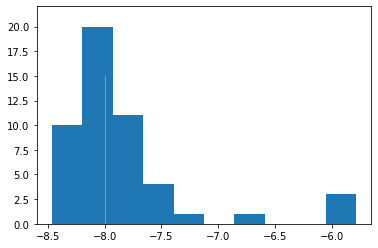

In [8]:

plt.hist(latent_codes['circle_logvars'])
plt.hist(latent_codes['square_logvars'])

In [12]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import torch
import torchvision.utils as vutils
from PIL import Image, ImageDraw, ImageFont, ImageColor

In [53]:
def generate_images_from_model(z):
    
    z = torch.Tensor([z])
    x = run.experiment.model.decode(z)
    x = x.squeeze().permute(1, 2, 0).detach().cpu().numpy()
    #im = Image.fromarray(x)
    plt.imshow(x)
    

interact(generate_images_from_model, z=(-0.75,1.0,0.05))

interactive(children=(FloatSlider(value=0.10000000000000009, description='z', max=1.0, min=-0.75, step=0.05), …

<function __main__.generate_images_from_model(z)>